# Dimensionality Reduction

Dataset: MNIST

Tasks: reduce the dataset’s dimensionality (PCA, t-SNE, LLE, MDS, LDA), then apply classification
(Logistic, SVM, Random Forest)

Hints: sklearn.decomposition, PCA(), IncrementalPCA(), KernelPCA()

### Import data set

In [1]:
pip install pandas numpy matplotlib sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Get the first 1000 rows because of performance reasons
X, y = mnist['data'], mnist['target']
X = X[:1000]
y = y[:1000]

# Extract features and target
X, y = mnist['data'], mnist['target']

print("Fetching data DONE")

Fetching data DONE


Shape of the data: (70000, 784)
Shape of the target: (70000,)


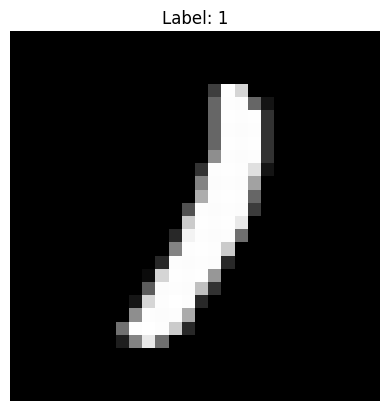

In [3]:
# Look at the shape of the data
print("Shape of the data:", X.shape)  # (70000, 784)
print("Shape of the target:", y.shape)  # (70000,)

# Extract 1 data point
sample_index = 78
sample_data = X.iloc[sample_index]
sample_label = y.iloc[sample_index]

# Reshape the data point into a 28x28 matrix
sample_image = sample_data.values.reshape(28, 28)

# Visualize the reshaped data point
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {sample_label}')
plt.axis('off')
plt.show()

### Projection using LDA

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y.astype(int))

# Create a DataFrame for the LDA results
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['label'] = y.astype(int).values

print("LDA transformation DONE")
print(lda_df.head())

LDA transformation DONE
        LD1       LD2  label
0 -0.981531 -0.606742      5
1 -3.058924 -3.052850      0
2  1.857910 -0.057523      4
3  0.515675  4.035153      1
4  3.234674 -1.578378      9


### Logistic Classification

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define the target variable and features
X = lda_df
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print('Logistic Regression Classification Report:')
print(report_log_reg)

Logistic Regression Accuracy: 0.9982857142857143
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00      1600
           2       1.00      1.00      1.00      1380
           3       1.00      1.00      1.00      1433
           4       1.00      1.00      1.00      1295
           5       1.00      1.00      1.00      1273
           6       0.99      1.00      0.99      1396
           7       1.00      0.99      0.99      1503
           8       1.00      1.00      1.00      1357
           9       1.00      1.00      1.00      1420

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



### Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Define the target variable and features
X = lda_df
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(report_rf)

Random Forest Accuracy: 0.9994285714285714
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00      1600
           2       1.00      1.00      1.00      1380
           3       1.00      1.00      1.00      1433
           4       1.00      1.00      1.00      1295
           5       1.00      1.00      1.00      1273
           6       1.00      1.00      1.00      1396
           7       1.00      1.00      1.00      1503
           8       1.00      1.00      1.00      1357
           9       1.00      1.00      1.00      1420

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



### SVM

In [7]:
from sklearn.svm import SVC

# Define the target variable and features
X = lda_df
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Classification Report:')
print(report_svm)

SVM Accuracy: 1.0
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00      1600
           2       1.00      1.00      1.00      1380
           3       1.00      1.00      1.00      1433
           4       1.00      1.00      1.00      1295
           5       1.00      1.00      1.00      1273
           6       1.00      1.00      1.00      1396
           7       1.00      1.00      1.00      1503
           8       1.00      1.00      1.00      1357
           9       1.00      1.00      1.00      1420

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

